In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [31]:
#Pre loading data and information 
per_loan = pd.read_csv('african_crises.csv')
per_loan_desc = per_loan.describe()
per_loan.head(10)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
5,1,DZA,Algeria,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,no_crisis
6,1,DZA,Algeria,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,no_crisis
7,1,DZA,Algeria,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,no_crisis
8,1,DZA,Algeria,1878,0,0.051948,0,0,0.0,-1.492537,0,0,0,no_crisis
9,1,DZA,Algeria,1879,0,0.052029,0,0,0.0,-16.831357,0,0,0,no_crisis


In [32]:
per_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [33]:
per_loan.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [34]:
#Creating a visual aid to identify outliers, and better understand data 
per_loan_values = per_loan["gdp_weighted_default"].value_counts()
per_loan["systemic_crisis"] = per_loan["systemic_crisis"].replace([-3, -2, -1],0 )
desc = per_loan.describe()

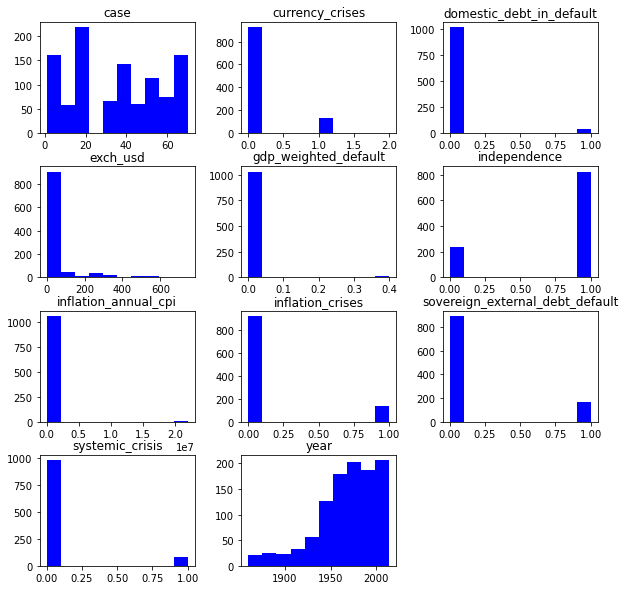

In [35]:
per_loan.hist(figsize=(10,10),color="blue", grid=False)
plt.show()

In [36]:
correlations = per_loan.corr()

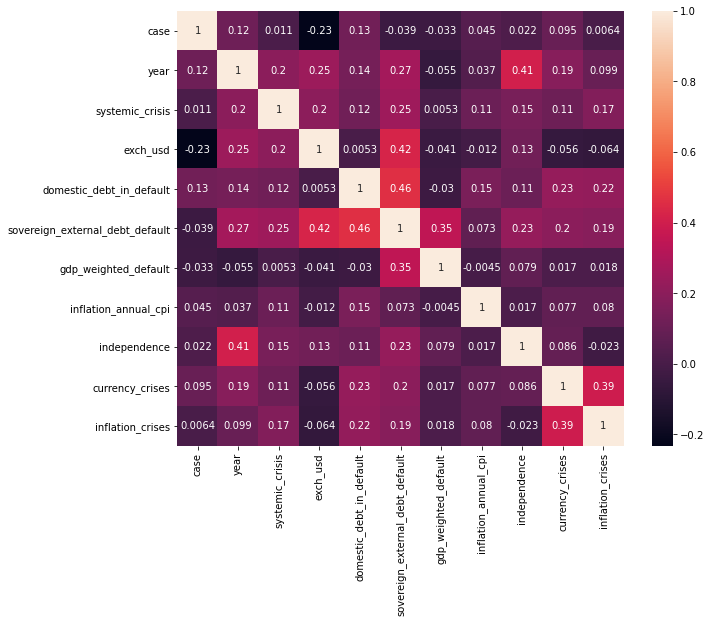

In [37]:
#Creating Heat Map 
plt.subplots(figsize=(10,8))
sns.heatmap(correlations,annot=True)

In [38]:
#Creaing X and Y variables for running our 3 different tests, also creating our dependent and independent variables
y = per_loan["systemic_crisis"]
features = ["inflation_annual_cpi", "exch_usd", "inflation_crises", "currency_crises" ]
x = pd.get_dummies(per_loan[features])

In [39]:
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state = 19) 

In [40]:
#Test Model 1 Random Forest Module 
model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=8)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

score_1 = model.score(x_test, y_test)
print(score_1)

0.9314285714285714


In [46]:
#Test Model 2 Nearest Neighbour Classifier 
model_2 = KNeighborsClassifier()
model_2.fit(x_train, y_train)
predicted = model_2.predict(x_test)

score_2 = model_2.score(x_test, y_test)
print(score_2)

0.9285714285714286


In [47]:
#Test Model 3 Defining the Decision Tree 
model_3 = DecisionTreeClassifier()
model_3.fit(x_train,y_train)
predicted = model_3.predict(x_test)

score_3 = model_3.score(x_test, y_test)
print(score_3)

0.9085714285714286


In [14]:
#We can see that from out 3 methodologies that testing using the Random Forest program we recieved a larger score when compared
#to the other 2 programs listed. A possible reason for the differences could be that we used 1000 trees in our "n_estimators=1000"
# for our Random forest. Another possible reason could be that the maximum depth of the tree was set to a specific number rather
#than letting value populate until all leaves contain less than min_samples_split samples.

#We believe if we refined the remaining programs in a similar method rater than letting them run until they cannot run anymore 
#we might recieve a more concise number. 

#In conclusion i beleive that our models and indicators are good predictors on whether the systemic crisis of these African Countries
#are affected by the variables we chose from the data set. Namely "inflation_annual_cpi", "exch_usd", "inflation_crises", "currency_crises"